<a href="https://colab.research.google.com/github/Siddhi232001/GRIP-TASK-6/blob/main/TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Decision Tree Algorithm **


**Decision Tree Algorithm**

Decision Tree Algorithm is the Supervised machine learning model. The goal of using Decision tree classifier is to create a training model that can use to predict the classes and value of the target variable by simple learning rules. This algoithm can perform both classification, regression and multioutput tasks.


The following code is executed by **Siddhi Kelshikar**.

**STEP 1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

**STEP 2: Importing Data**

In [ ]:
iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
new = iris.target
new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df['species']=iris['target']
df['species']=df['species'].apply(lambda x: iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**STEP 3: Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Minimum width of the petal is 0.100000
maximum width of the petal is 2.500000

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

**STEP 4: Data visualization**

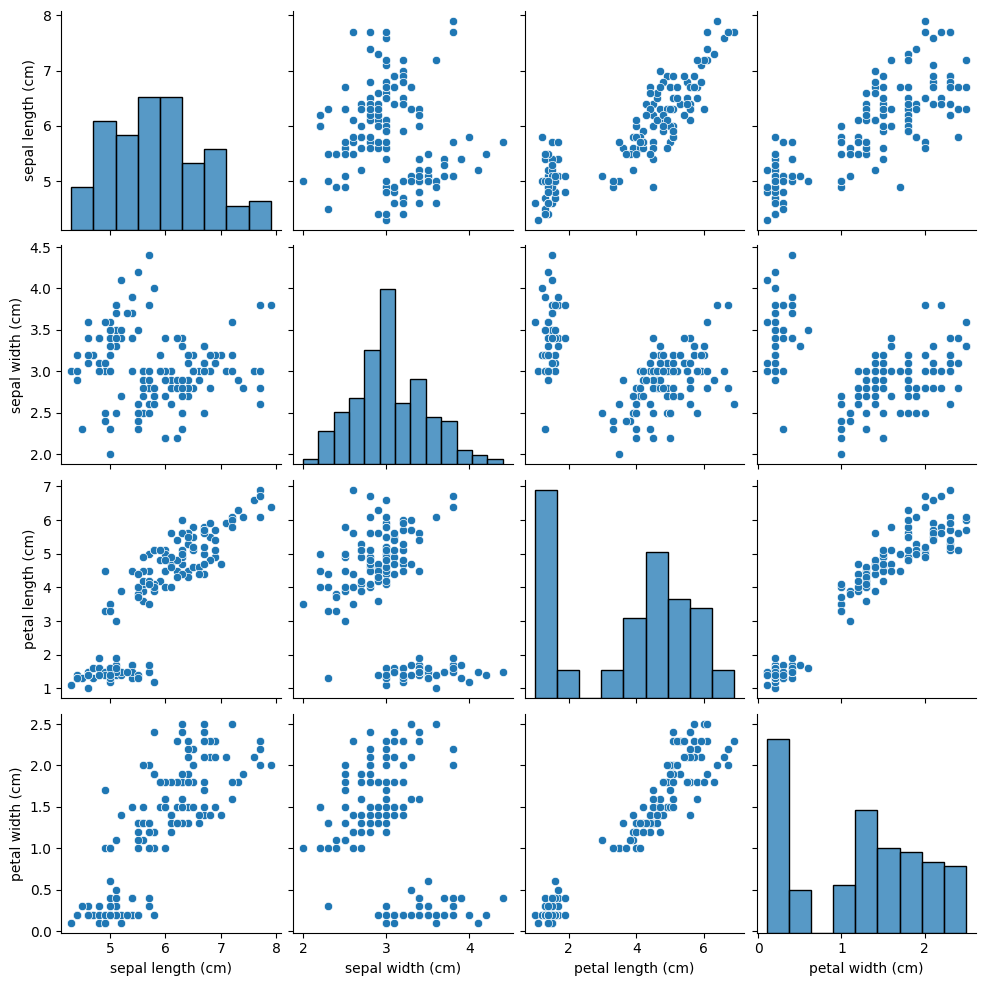

In [ ]:
# Pairplot
sns.pairplot(df)

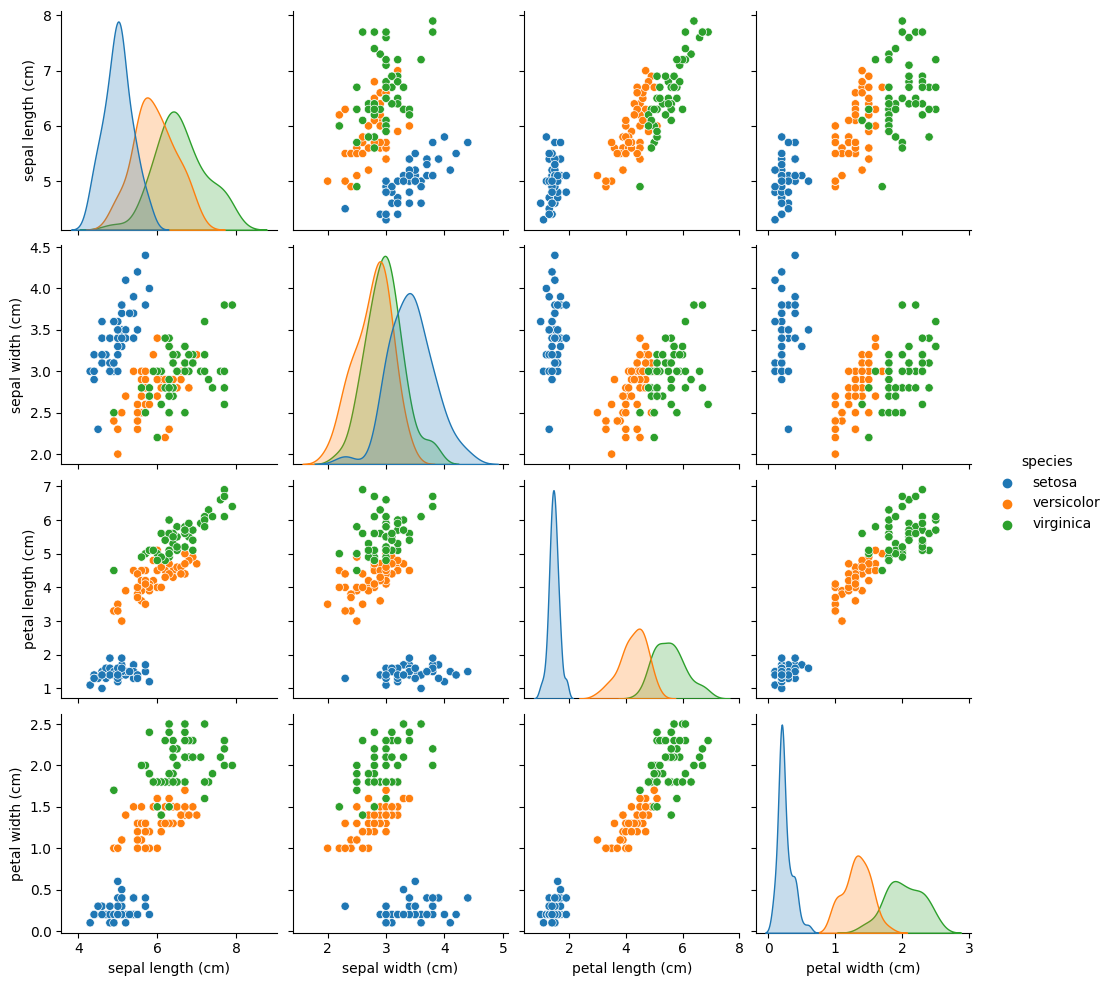

In [ ]:
# Comparing various features and relationship
sns.pairplot(df, hue='species')

1. From the above plot we can conclude that iris-setosa can be easily identified whereas the iris-virginica and iris-versicolor are overlapping.

2. Petal-length and Petal width is important feature for identifying the flower

<Axes: >

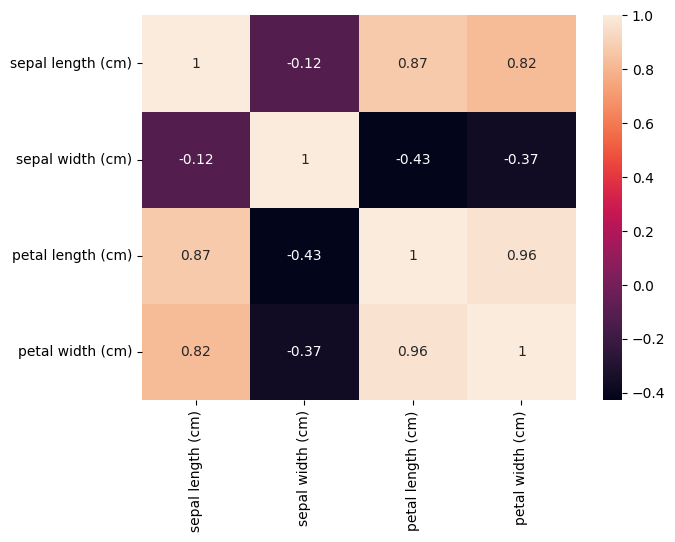

In [ ]:
# Plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)

From the above heatmap we can conclude that the Petal width and petal length are positively correlated with each other.


**STEP 5: Training and Testing**

In [ ]:
# Preparating the data for training

# ML cannot work with string values so we need to drop some columns. So we need to label encoding with "y"

#x-y split
x= df.iloc[:,:-1].values #feature matrix
y= df.iloc[:,-1].values #vector of predictions

In [ ]:
#  The LabelEncoder is a tool used in machine learning to convert categorical (text) data into numerical format.
from sklearn.preprocessing import LabelEncoder

In [ ]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
lab = LabelEncoder()
y = lab.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, train_size=0.8, random_state = 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
# Training the model

from sklearn.tree import DecisionTreeClassifier as dt

classifier= dt(class_weight='balanced')
classifier.fit(x_train,y_train)

y_pred= classifier.predict(x_test)

In [ ]:
# Predicting value

y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
# Actual value
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
# Comparing predicted and actual value
data = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
data.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
# Accuracy score

accuracy_score(y_test,y_pred)

0.9666666666666667

**STEP 6: Visualize the Decision Tree**

In [ ]:
# Function Name
fn=['sepal length(cm)', 'sepal width (cm)', 'petal length(cm)', 'petal width (cm)' ]

# Class Name
cn=['setosa', 'versicolor', 'virginica']

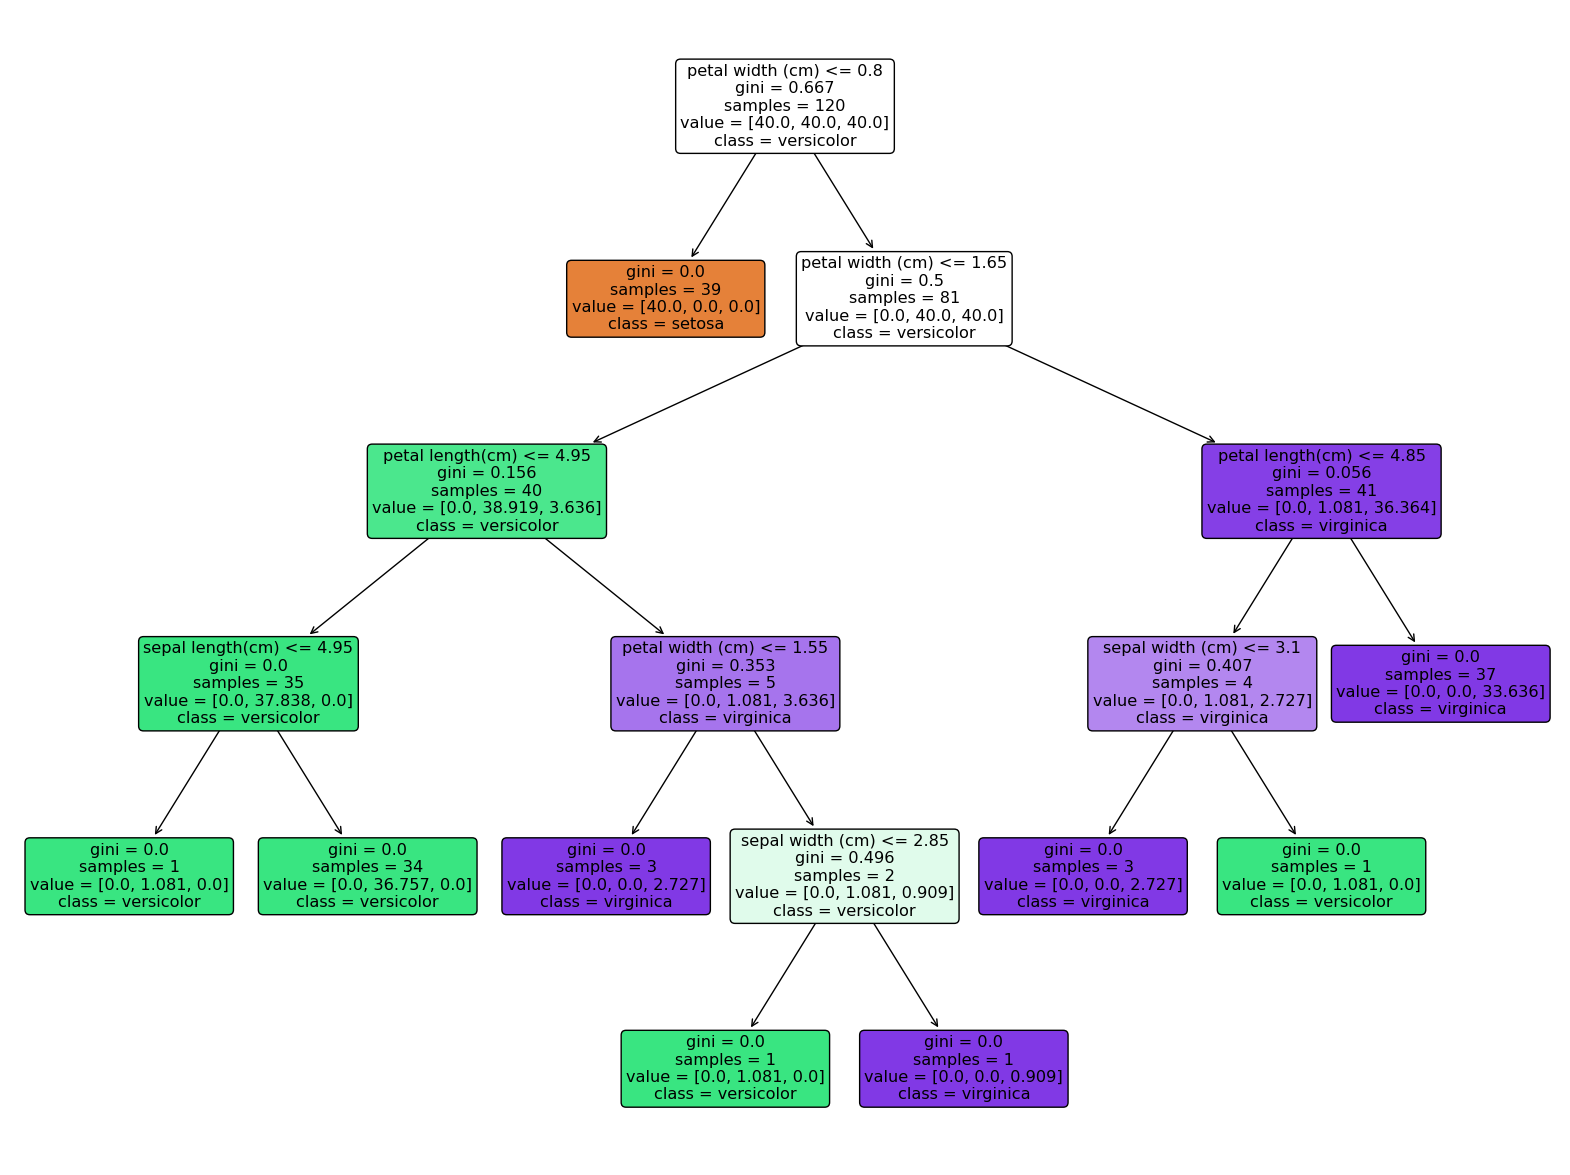

In [ ]:
# Visualize the graph or decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(classifier, feature_names=fn, class_names=cn, filled=True, rounded=True)
plt.show()